In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train=pd.read_csv('../input/nlp-getting-started/train.csv')
data_test=pd.read_csv('../input/nlp-getting-started/test.csv')

In [3]:
data_train.sample(3)

,id,keyword,location,text,target
3645,5194,fatalities,San Francisco,'Motordom' lobbied to change our language arou...,0
4087,5808,hail,"Brasil, Fortaleza ce",Seen on Fahlo:#WCW All Hail the QueenåÊ?? http...,0
791,1146,blight,NaN,THDA Kicks Off Anti-Blight Loan Effort in Memp...,0


In [4]:
data_train.shape

(7613, 5)

In [5]:
data_test.sample(4)

,id,keyword,location,text
903,2978,dead,65 Skelmersdale Lane,Nooooo the village hotty is dead ???????? #Emm...
1626,5472,flames,NaN,@xodeemorgss she went to get rice and the whol...
1984,6691,landslide,NaN,5 need to-dos seeing as how technical writing ...
384,1248,blood,The Land of Pleasant Living,Bitch I'm a monster no good blood sucker


In [6]:
data_test.shape

(3263, 4)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


data_train=data_train.astype({'keyword':'string','location':'string'})

In [8]:
data_train.isnull().sum()/data_train.shape[0]*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [9]:
data_train.duplicated().sum()

0

In [10]:
data_train['location'].value_counts()
#there are so many categories which is appearing only once so we can make a single category by combining all

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

<AxesSubplot:>

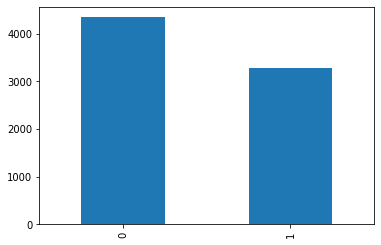

In [11]:
data_train['target'].value_counts().plot(kind='bar')

<AxesSubplot:>

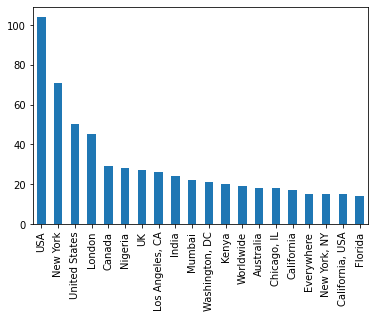

In [12]:
data_train['location'].value_counts()[0:20].plot(kind='bar')

<AxesSubplot:>

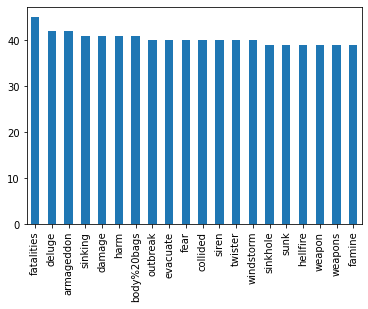

In [13]:
data_train['keyword'].value_counts()[0:20].plot(kind='bar')

<AxesSubplot:>

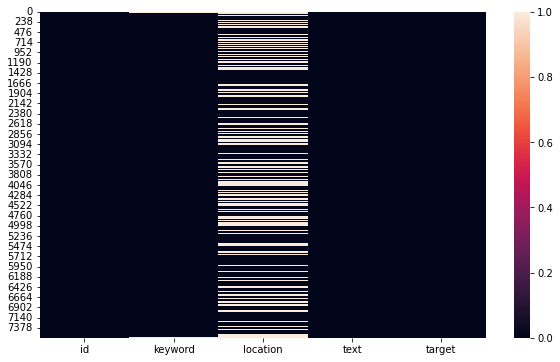

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train.isnull())

In [15]:
#handling missing value in keywords
#data=data_train.dropna(subset=['keyword','location'])


In [16]:
#pd.concat([data_train['keyword'].value_counts()/len(data_train),
 #data['keyword'].value_counts()/len(data),
 #],axis=1)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.feature_selection import SelectKBest,chi2
transformer=ColumnTransformer(transformers=[
             ('trf1',SimpleImputer(strategy='most_frequent'),[0]),
             ('trf3',SimpleImputer(strategy='constant'),[1])
               ],remainder='passthrough')
transformer1=ColumnTransformer(transformers=[
    ('trf4',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1])
       ],remainder='passthrough')

In [18]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('transformer',transformer),
    ('transformer1',transformer1),
    
      ])

In [19]:
array_keyword_location=pipe.fit_transform(data_train.drop(columns=['id','text','target']))
array_keyword_location1=pipe.fit_transform(data_test.drop(columns=['id','text']))

In [20]:
array_keyword_location

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
pipe.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf1',
                                  SimpleImputer(strategy='most_frequent'), [0]),
                                 ('trf3', SimpleImputer(strategy='constant'),
                                  [1])]),
 'transformer1': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf4',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1])])}

In [22]:
#now work on text column

In [23]:
from nltk.tokenize import word_tokenize,sent_tokenize
data_train['total_character']=data_train['text'].apply(len)
data_train['total_word']=data_train['text'].apply(lambda x : len(word_tokenize(x)))
data_train['total_sentence']=data_train['text'].apply(lambda x : len(sent_tokenize(x)))
data_train

,id,keyword,location,text,target,total_character,total_word,total_sentence
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24,2
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21,2


<AxesSubplot:ylabel='Frequency'>

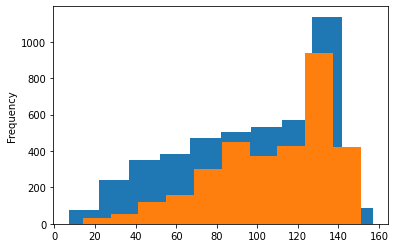

In [24]:
data_train[data_train['target']==0]['total_character'].plot(kind='hist')
data_train[data_train['target']==1]['total_character'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

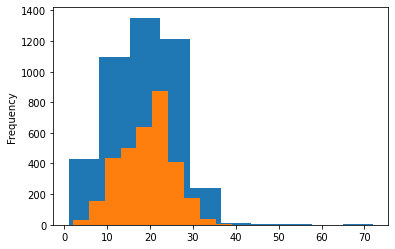

In [25]:
data_train[data_train['target']==0]['total_word'].plot(kind='hist')
data_train[data_train['target']==1]['total_word'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

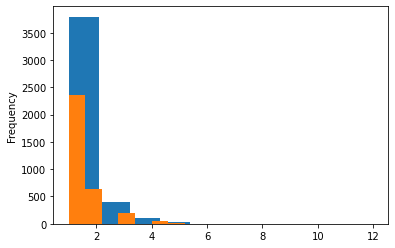

In [26]:
data_train[data_train['target']==0]['total_sentence'].plot(kind='hist')
data_train[data_train['target']==1]['total_sentence'].plot(kind='hist')

In [27]:
data_train['text']=data_train['text'].str.lower()
data_test['text']=data_test['text'].str.lower()
from nltk import word_tokenize
data_train['text']=data_train['text'].apply(lambda x:word_tokenize(x))
data_test['text']=data_test['text'].apply(lambda x:word_tokenize(x))
def remove_special_char(list):
    y=[]
    for string in list:
        if string.isalnum():
            y.append(string)
    return y
data_train['text']=data_train['text'].apply(lambda x:remove_special_char(x))
data_test['text']=data_test['text'].apply(lambda x:remove_special_char(x))
from nltk.corpus import stopwords
import string
def useful_words(list):
    y=[]
    for text in list:
        if text not in stopwords.words('english') and text not in string.punctuation:
                y.append(text)
    return y
data_train['text']=data_train['text'].apply(lambda x:useful_words(x))
data_test['text']=data_test['text'].apply(lambda x:useful_words(x))
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stemming(list):
    y=[]
    for text in list:
        y.append(ps.stem(text))
    return y
data_train['text']=data_train['text'].apply(lambda x:stemming(x)) 
data_train['text']=data_train['text'].apply(lambda x:" ".join(x))
data_test['text']=data_test['text'].apply(lambda x:stemming(x)) 
data_test['text']=data_test['text'].apply(lambda x:" ".join(x))

In [28]:
data_train

,id,keyword,location,text,target,total_character,total_word,total_sentence
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1,69,14,1
1,4,NaN,NaN,forest fire near la rong sask canada,1,38,8,2
2,5,NaN,NaN,resid ask place notifi offic evacu shelter pla...,1,133,24,2
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1,65,9,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home...,1,83,13,1
7609,10870,NaN,NaN,thetawniest control wild fire california even ...,1,125,24,2
7610,10871,NaN,NaN,utc 5km volcano hawaii http,1,65,15,2
7611,10872,NaN,NaN,polic investig collid car littl portug rider s...,1,137,21,2


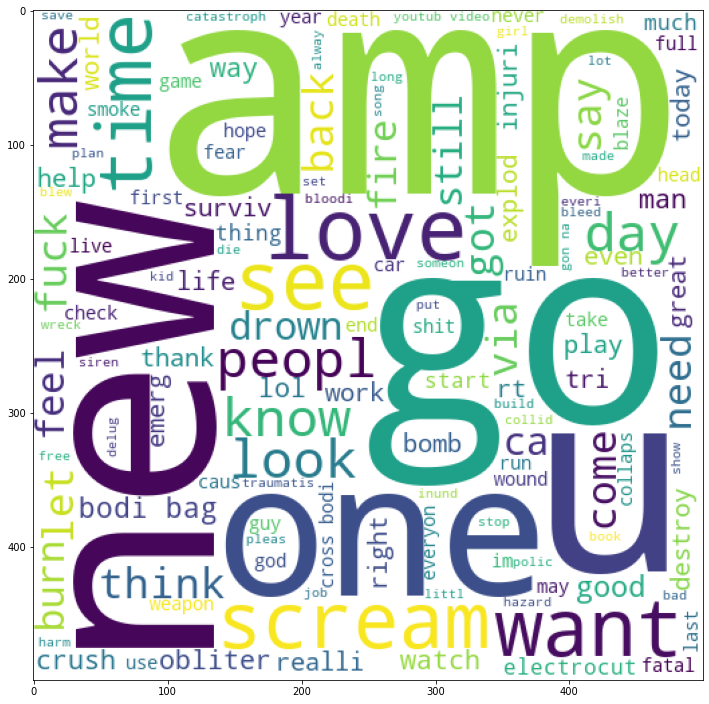

In [29]:
plt.figure(figsize=(12,15))
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data_train[data_train['target']==0]['text'].str.cat(sep=" "))
plt.imshow(w_c)

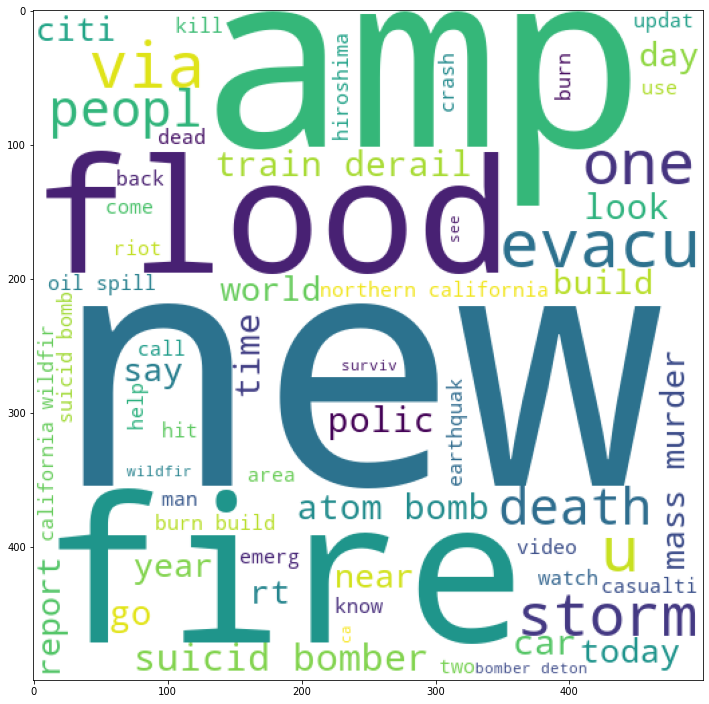

In [30]:
plt.figure(figsize=(12,15))
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data_train[data_train['target']==1]['text'].str.cat(sep=" "))
plt.imshow(w_c)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(data_train['text']).toarray()
test=tfidf.fit_transform(data_test['text']).toarray()
y=data_train['target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56,stratify=y)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [32]:
l=[gb,mb,bb]
for model in l:
    train(model)

GaussianNB()
[[555 531]
 [151 667]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      1086
           1       0.56      0.82      0.66       818

    accuracy                           0.64      1904
   macro avg       0.67      0.66      0.64      1904
weighted avg       0.69      0.64      0.64      1904

0.6418067226890757
MultinomialNB()
[[973 113]
 [263 555]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1086
           1       0.83      0.68      0.75       818

    accuracy                           0.80      1904
   macro avg       0.81      0.79      0.79      1904
weighted avg       0.81      0.80      0.80      1904

0.8025210084033614
BernoulliNB()
[[970 116]
 [257 561]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1086
           1       0.83      0.69      0.75       818

    accuracy                    

In [33]:
predict=bb.predict(test)

In [34]:
submission=pd.DataFrame({'id':data_test['id'],'target':predict})

In [35]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,1
3261,10874,1


In [36]:
submission.to_csv('submission_tfidf.csv' , index = False)